<a href="https://colab.research.google.com/github/thiagorayam/RNA/blob/main/Matriz_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=20
Ntrain=15
dim=5

A=np.zeros((N, dim, dim))
label=np.zeros(N)
ref_arquivo = open("/content/sample_data/Matriz A.txt","r")
for j in range (N):
    linha = ref_arquivo.readline()
    for i in range(dim):
        valores=linha.split()
        A[j,i]=np.array(valores)
        linha = ref_arquivo.readline()
    label[j]=np.array(linha.split())
    linha = ref_arquivo.readline()

indices = np.arange(A.shape[0])
np.random.shuffle(indices)
A = A[indices]
label = label[indices]

X=A.reshape(N,dim*dim)
y=label
Xtrain=X[0:Ntrain]
ytrain=label[0:Ntrain]

ref_arquivo.close()

In [ ]:
class Adaline(object):
    def __init__(self, eta = 0.01, epoch = 15, epsilon=0.0001):
        # parâmetros de taxa de aprendizagem, número máximo de épocas e precisão requerida;
        self.eta = eta
        self.epoch = epoch

    def fit(self, X, y):

        # inicialização dos pesos de forma aleatória. Com valores entre -1 e 1.
        np.random.seed(0)
        self.weight = np.random.uniform(-1, 1, X.shape[1] + 1) 
        E=0 

        for _ in range(self.epoch):
            
            output = np.dot(X, self.weight[1:]) - self.weight[0]
            error = y - output
            
            self.weight[0] += self.eta * sum(error)
            self.weight[1:] += self.eta * X.T.dot(error)

            if (abs(E - 1/2 * sum((error**2)))<0.1): 
               print(_)
               break

            E = 1/2 * sum((error**2))

        return self

    def predict(self, X):
        return np.where((np.dot(X, self.weight[1:]) - self.weight[0]) >= 0.0, 1, -1)

In [ ]:
clf = Adaline()
clf.fit(Xtrain, ytrain)
ypred=clf.predict(X)

13


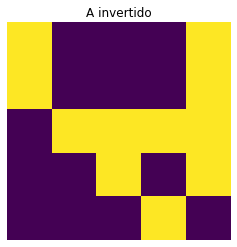

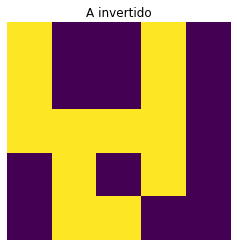

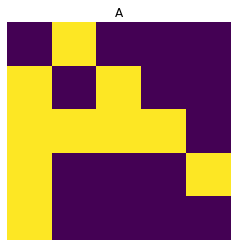

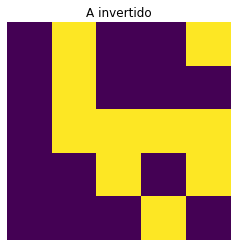

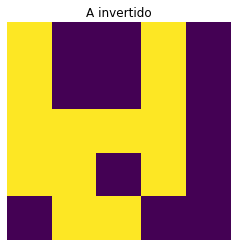

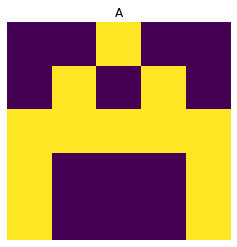

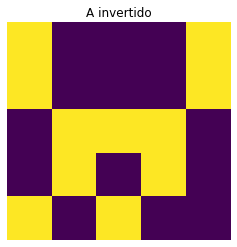

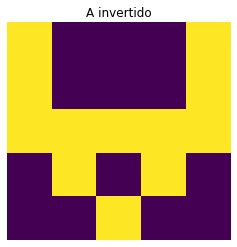

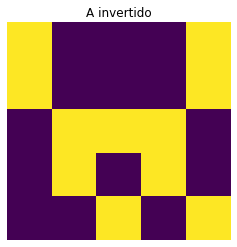

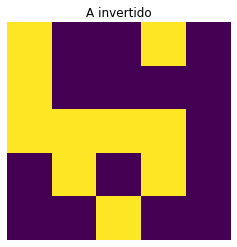

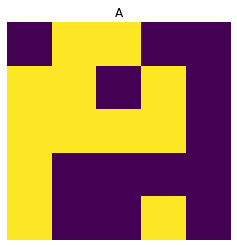

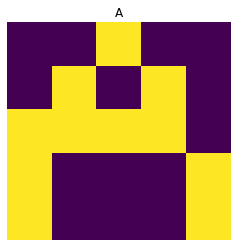

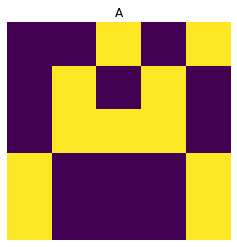

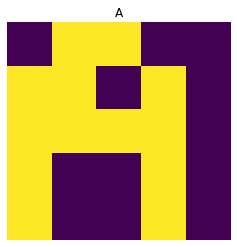

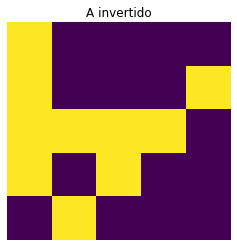

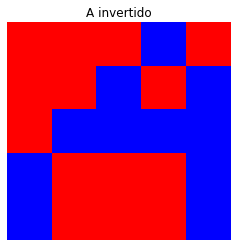

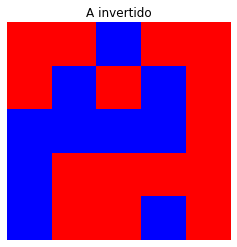

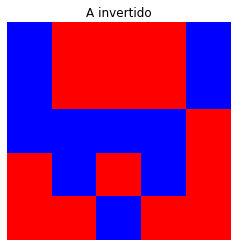

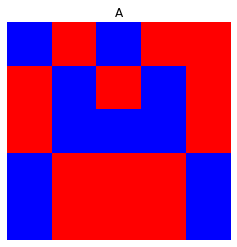

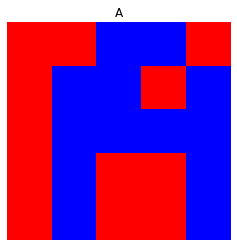

In [ ]:
from matplotlib.colors import ListedColormap
for j in range (N):
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      plt.figure(figsize=(4,4))
      if j<Ntrain: im=plt.imshow(A[j],aspect='auto')
      else: im=plt.imshow(A[j],cmap=cm_bright,aspect='auto')
      plt.axis("off")
      if ypred[j] > 0: plt.title( 'A' )
      else: plt.title( 'A invertido' )
      plt.show()